# Das Schiebepuzzle
Sicherlich kennst du die sogenannten *Schiebepuzzles*, bei denen man die Teile eines Bildes oder Musters durch Verschieben in die richtige Reihenfolge bringen muss:

<table align=left><tr>
<td> <img src="images/freiburg_schiebepuzzle_animiert.gif" alt="Schiebepuzzle mit Bild" title="Bildquelle: https://pixabay.com/de/photos/freiburg-stadt-m%C3%BCnster-3570532/" style="width: 200px;"/> </td>
<td> <img src="images/schiebepuzzle-wikipedia.png" alt="Schiebepuzzle mit Buchstaben" title="Quelle: https://en.wikipedia.org/wiki/15_puzzle" style="width: 200px;"/> </td>
</tr></table>
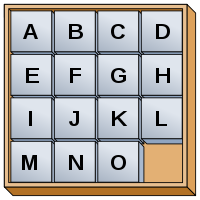
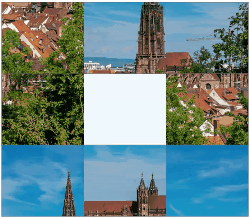

Wenn du schon einmal versucht hast, ein solches Puzzle zu lösen, weißt du, dass das gar nicht so leicht ist. Weiter unten in diesem Notebook (Abschnitt "Spiele selbst") kannst du es ausprobieren. Die Schwierigkeit liegt darin, dass zwar in jedem Zustand des Puzzles nur maximal 4 Felder verschoben werden können, daraus aber nach mehreren Zügen eine Vielzahl möglicher Kombinationen entsteht. Wer nur planlos herumschiebt, d.h. wahllos Zugkombinationen ausprobiert, kann kaum hoffen, das Ziel zu erreichen - es gibt einfach zu viele mögliche mögliche Zugsequenzen.

Wie viele? Rechne es in der nächsten Codezelle selbst aus:

In [21]:
moeglichkeiten_pro_zug = 2.7   # durchschnittliche Anzahl von Zugmöglichkeiten in einem Zustand  
zuege = 32

sequenzen = int(moeglichkeiten_pro_zug ** zuege)   # Potenzieren --> exponentielles Wachstum!

print(f"Macht man {zuege} Züge, gibt es beim Schiebepuzzle ca. {sequenzen} verschiedene Zugsequenzen.")
nullen = len(str(sequenzen)) - 1
print(f"Das entspricht einer Zahl mit {nullen} Nullen.")

Macht man 32 Züge, gibt es beim Schiebepuzzle ca. 63626854411359 verschiedene Zugsequenzen.
Das entspricht einer Zahl mit 13 Nullen.


Wie du siehst, wächst die Anzahl der potentiell möglichen Zustände *exponentiell* mit der Länge der Zugsequenz. Ein solches rasantes Wachstum kann selbst die schnellste Hardware nicht ausgleichen, d.h. selbst der beste Computer kann nicht einfach alle möglichen Zugsequenzen durchprobieren! 

In dieser Unterrichtseinheit wirst du jedoch KI-Algorithmen kennenlernen, die so "clever" nach einer Lösung suchen, dass sie Schiebepuzzle und andere Aufgaben, bei denen Menschen und "klassische" Algorithmen keine Chance habenin kürzester Zeit lösen.

Betrachten wir aber zuerst noch einmal genauer, worin die Komplexität von Problemen wie dem Schiebepuzzle, Schach oder auch der Routenplanung in einem Navigationsgerät liegt.

#### Der Verzweigungsfaktor
Die Anzahl der Aktionsmöglichkeiten, die man in einem Zustand hat, nennt man in der KI den **Verzweigungsfaktor** (engl. *branching factor*). Dieser Faktor trägt entscheidend dazu bei, wie schwierig ein Problem für einen Computer zu lösen ist. Wie wir wissen, ist beim Schiebepuzzle der Verzweigungsfaktor maximal 4, im Durchschnitt vielleicht 3. 

Beim Schach beträgt der Verzweigungsfaktor im Durchschnitt ca. 35, d.h. ein Spieler hat durchschnittlich in jeder Spielsituation ca. 35 verschiedene Züge zur Auswahl. 

Beim Go hingegen, das auf einem 19x19 Felder großen Brett gespielt wird, ist der Verzweigungsfaktor ca. 250!

Berechne mithilfe der folgenden Zelle die Anzahl aller möglichen Zugsequenzen bei 10 Zügen für verschiedene Spiele:

In [22]:
zuege = 15
spiele = [("Schiebepuzzle", 2.7), ("Schach", 35), ("Go", 250)]
for spiel, verzweigungsfaktor in spiele:
    sequenzen = int(verzweigungsfaktor ** zuege)
    print(f"{spiel}: Nach {zuege} Zügen gibt es ca. {sequenzen} mögliche Zugsequenzen.")
    stellen = len(str(sequenzen))
    print(f"Das ist eine Zahl mit {stellen} Stellen.")

Schiebepuzzle: Nach 15 Zügen gibt es ca. 2954312 mögliche Zugsequenzen.
Das ist eine Zahl mit 7 Stellen.
Schach: Nach 15 Zügen gibt es ca. 144884079282928466796875 mögliche Zugsequenzen.
Das ist eine Zahl mit 24 Stellen.
Go: Nach 15 Zügen gibt es ca. 931322574615478515625000000000000000 mögliche Zugsequenzen.
Das ist eine Zahl mit 36 Stellen.


Nun erhöhe den Wert der Variable `zuege` langsam. Schon bald wachsen selbst die anfangs niedrigen Werte beim Schiebepuzzle immer schneller - beim Go wachsen sie ins Unermessliche...

Bemerkung: Eine typische Go-Partie dauert ca. 100-150 Züge!

### Problemlösen und Suche
Genau wie wir Menschen muss eine KI bei solchen Spielen versuchen *vorausschauend* zu denken: Sie spielt "im Kopf" Zugsequenzen durch und wählt dann eine *vielversprechende* aus (was darunter zu verstehen ist, erfährst du im Notebook über *Heuristiken*).

In der KI spricht man bei solchen Verfahren von

* Problemlösen bzw.
* Suche oder
* (Handlungs-)planung

Die Methoden werden nicht nur für Knobelspiele wie das Schiebepuzzle oder zur Lösung von Sudokus angewendet, sondern sind auch die Grundlage für Schachprogamme oder den Routenplaner in einem Navigationssystem.  Auch der Roboter, dem du in Zukunft vielleicht den Befehl "Besorge mir einen Kaffee!" gibst, muss "überlegen", in welchen Schritten er diese Aufgabe lösen kann.

Diesen Methoden ist gemein, dass die KI ein Problem nicht durch Lernen löst, sondern durch "Nachdenken".

## Das 8-Puzzle, ein einfaches Schiebepuzzle
Bevor wir eine KI für das Schiebepuzzle programmieren, werden wir dem Computer zuerst die *Regeln* des Spiels beibringen, so dass ein Mensch am Computer Puzzles lösen kann.  Dazu braucht es noch keine KI, aber wir müssen u.a. folgende Fragen beantworten:

* Wie repräsentieren wir einen *Zustand* im Programm?
* Welche *Züge* sind in einem bestimmten Zustand erlaubt und welche nicht?
* Was bedeutet es, einen Zug *auszuführen*?
* Wie kann das Programm überprüfen, ob eine *Zugsequenz* eine *Lösung* für das Puzzle ist oder nicht?

Wir beginnen mit dem einfachsten Schiebepuzzle, bei dem 8 Plättchen auf einem 3x3 großen Feld verschoben werden. (Die nächste Schwierigkeitsstufe - das 15-Puzzle auf einem 4x4-Feld - ist bereits ungleich schwieriger.) 

#### Repräsentation eines Spielzustands

Der Einfachheit halber verwenden wir für die Plättchen die Buchstaben 'A' bis 'H' und das Leerzeichen für das freie Feld. Einen Zustand des Puzzles können wir dann durch einen String der Länge 9 repräsentieren:

In [23]:
start = 'CBD AFGEH'
ziel  = 'ABCDEFGH '

Das ist wenig anschaulich, also schreiben wir eine Funktion `pprint`, die den Zustand hübsch darstellt. (Wenn du die lieber Trennlinien o.ä. angezeigt bekommen möchtest - nur zu, du brauchst nur diese Funktion anzupassen!)

In [24]:
def pretty_str(zustand):
    n = 3
    zeilen = [zustand[i:i+n] for i in range(0, n*n, n)]  # String in 3 Zeilen mit je 3 Buchstaben umwandeln
    return "\n".join(" ".join(zeile) for zeile in zeilen)  # zu neuem String zusammenfügen

def pprint(zustand, ueberschrift=""):
    if ueberschrift:
        print(f"{ueberschrift}")
    print(pretty_str(zustand))

pprint(start, "Startzustand:")
print()
pprint(ziel, "Zielzustand:")

Startzustand:
C B D
  A F
G E H

Zielzustand:
A B C
D E F
G H  


#### Züge machen

Einen Zug durchzuführen bedeutet, dass das ausgewählte Feld mit dem leeren Feld "den Platz tauscht":

In [25]:
def verschiebe_pos(puzzle, pos):
    leer_pos = puzzle.index(' ')
    neu = list(puzzle)  # Kopie
    neu[leer_pos] = puzzle[pos]   # Stein wandert an bisher leere Position
    neu[pos] = ' '    # alte Position des Steins ist jetzt leer
    return "".join(neu)

pprint(start, "Startzustand:")
neuer_zustand = verschiebe_pos(start, 0)
pprint(neuer_zustand, "\nNach Verschieben des Steins an Position 0:")

Startzustand:
C B D
  A F
G E H

Nach Verschieben des Steins an Position 0:
  B D
C A F
G E H


#### Welche Züge sind in einem Zustand möglich?

Natürlich müssen wir sicher stellen, dass Spieler (egal ob Mensch oder Computer) nur legale Züge machen. 

Es gilt: Genau diejenigen Felder, die an das leere Feld angrenzen, können bewegt werden. Je nachdem, wo sich das leere Feld befindet, hat es vier Nachbarfelder (leeres Feld in der Mitte), drei (leeres Feld am Rand) oder nur zwei (leeres Feld in einer Ecke). Wir ermitteln die jeweils möglichen Züge mit der Funktion `moegliche_zuege`:

In [26]:
def moegliche_zuege(puzzle):
    leer_pos = puzzle.index(' ')  
    y, x = divmod(leer_pos, 3)  # 2d-Koordinaten aus 1d-Position  bestimmen
    kandidaten = [(x, y - 1), (x - 1, y), (x + 1, y), (x, y + 1)]  # Potentielle Nachbarn in 4 Himmelsrichtungen
    nachbarn = [k for k in kandidaten if k[0] in [0, 1, 2] and k[1] in [0, 1, 2]]  # Nur Nachbarn innerhalb des 3x3 Felds
    return [kx + 3 * ky for (kx, ky) in nachbarn]  # wieder in 1d-Darstellung zurückwandeln

moegliche_zuege(start)

[0, 4, 6]

Wir haben nun alle Voraussetzungen, um das Schiebepuzzle zu programmieren:
* die *Repräsentation* eines Spielzustands als String
* die Funktion `verschiebe_pos`, die den *Übergang* von einem Zustand in einen Folgezustand beschreibt - mit anderen Worten: einen Zug
* die Funktion `moegliche_zuege`, die das tut, was ihr Name verspricht: Sie liefert eine Liste der in einem Zustand möglichen Züge

Dass das funktioniert, zeigen wir zuerst, indem wie **interaktives Spiel** programmieren, bei dem ein *Mensch* das Puzzle löst.

## Spiele selbst: Löse ein Schiebepuzzle in weniger als 20 Zügen!
<a id='selbst_spielen'></a>

 

Du kannst das Spiel mit dem Befehl `interaktives_spiel(start, ziel)` starten (s. auskommentierte Zeile gegen Ende der folgende Zelle). Wichtig ist, das Spiel immer mit der Taste 'q' zu beenden, sonst blockiert das noch laufende Spiel den Jupyter-Kernel und das Notebook.

In [27]:
def interaktives_spiel(start, ziel, max_zuege=20):
    print(f"Löse das Schiebepuzzle in max. {max_zuege} Zügen!")
    zustand = start
    zug_nr = 1
    while zustand != ziel and zug_nr <= max_zuege:
        pprint(zustand, "\nAktueller Zustand:\n")
        print(f"\nZug {zug_nr}: Welches Feld möchtest du bewegen? ", end="")
        zuege = moegliche_zuege(zustand)
        steine = ", ".join(zustand[z] for z in zuege)
        while True:
            zug = input("Tippe " + steine + " oder Q (Abbruch):  ").upper()
            if zug in steine:
                zug_pos = zustand.index(zug)
                break
            if zug == 'Q':
                return
        zustand = verschiebe_pos(zustand, zug_pos)
        zug_nr += 1
    pprint(zustand, "\nEndzustand")
    if zustand != ziel:
        print(f"Du hast das Puzzle leider nicht in {max_zuege} Zügen gelöst!")
    else:
        print(f"Du hast das Ziel in {zug_nr - 1} Zügen erreicht!")

# Um zu spielen entferne das Kommentarzeichen in der nächsten Zeile und führe die Zelle mit Strg-Enter aus:

#interaktives_spiel('CBD AFGEH', 'ABCDEFGH ')

# Achtung: Beende das Spiel immer nur mit der Taste 'q' - sonst wartet der Jupyter-Kernel weiter auf deine Eingaben
# und blockiert das Notebook. Zur Not kannst du es mit "Restart Kernel" noch einmal neu starten. 
# Am Besten kommentierst du die obige Zeile danach wieder aus. Dann kannst du das gesamte Notebook wieder problemlos ausführen.

## Zufällige Züge machen
Einen (ziemlich dummen) Computerspieler erhält man, wenn man in jedem Zustand *zufällig* einen der möglichen Züge auswählt und ausführt.

Führe die folgende Zelle mehrfach aus (Strg-Enter). Was passiert?

In [28]:
import random
test = "ABCD EFGH"
pprint(test)
zuege = moegliche_zuege(test)
print("Mögliche Züge:", zuege)
zug = random.choice(tuple(zuege))
print("Zufallszug:", zug)
resultat = verschiebe_pos(test, zug)
pprint(resultat)

A B C
D   E
F G H
Mögliche Züge: [1, 3, 5, 7]
Zufallszug: 1
A   C
D B E
F G H


Ein **random walk**, also ein "zufälliger Spaziergang" entsteht, wenn wir mehrfach hintereinander Folgendes wiederholen:
1. Wir bestimmen im aktuellen Zustand die möglichen Züge
2. wählen einen davon aus
3. führen ihn aus
4. erhalten dadurch einen neuen aktuellen Zustand
5. und beginnen wieder bei Schritt 1

Anmerkung: In Schritt 2 möchte man evtl Züge ausschließen, die in einen schon bekannten Zustand führen. Wir sind hier etwas weniger streng und verbieten nur, das gleiche Plättchen zweimal hintereinander zu bewegen, weil sich diese Züge gegenseitig aufheben.

In [29]:
def erzeuge_random_walk(beginn, schritte):
    walk = []
    bekannt = set()   # leere Menge
    aktuell = beginn
    for _ in range(schritte):
        bekannt.add(aktuell)
        zuege = moegliche_zuege(aktuell)
        random.shuffle(zuege)
        while zuege:
            zug = zuege.pop()
            neuer_zustand = verschiebe_pos(aktuell, zug)
            if neuer_zustand not in bekannt:
                aktuell = verschiebe_pos(aktuell, zug)
                walk.append(zug)
                break
        else:  # wird nur ausgeführt, wenn die while-Bedingung False wird
            # Sollte fast nie passieren: Wir können von hier aus nur in schon bekannte Zustände kommen --> Neustart
            return erzeuge_random_walk(beginn, schritte)
    return walk

erzeuge_random_walk(start, 20)

[0, 1, 4, 3, 0, 1, 2, 5, 8, 7, 4, 5, 8, 7, 6, 3, 0, 1, 2, 5]

In [30]:
def zugsequenz_ausfuehren(beginn, zuege, anzeigen=False):
    if anzeigen: pprint(beginn)
    aktuell = beginn
    for zug in zuege:
        leer_pos = aktuell.index(' ')
        if anzeigen:
            print(f"\nVerschiebe {aktuell[zug]} von Position {zug} nach {leer_pos}:")
        aktuell = verschiebe_pos(aktuell, zug)
        if anzeigen: pprint(aktuell)
    return aktuell

In [31]:
# Test: Random walks erzeugen und anzeigen
schritte = 5   # Probiere längere random walks aus, indem du diese Variable veränderst!
zug_sequenz = erzeuge_random_walk(start, schritte)
end_zustand = zugsequenz_ausfuehren(start, zug_sequenz, anzeigen=True)

C B D
  A F
G E H

Verschiebe A von Position 4 nach 3:
C B D
A   F
G E H

Verschiebe B von Position 1 nach 4:
C   D
A B F
G E H

Verschiebe C von Position 0 nach 1:
  C D
A B F
G E H

Verschiebe A von Position 3 nach 0:
A C D
  B F
G E H

Verschiebe B von Position 4 nach 3:
A C D
B   F
G E H


## Exkurs: Schiebepuzzle-Aufgaben verschiedener Schwierigkeitsgrade erfinden
Beim Schiebepuzzle können wir random walks nutzen, um uns zufällig beliebig weit vom _Ziel_ zu entfernen. Den so entstandenen Zustand benutzen wir dann als _Startzustand_ für eine Aufgabe.  Je länger der random walk, desto schwieriger wird die Aufgabe.

In [32]:
def random_walk_ausfuehren(beginn, schritte):
    return zugsequenz_ausfuehren(beginn, erzeuge_random_walk(beginn, schritte))

leicht = random_walk_ausfuehren(ziel, 6)
mittel = random_walk_ausfuehren(ziel, 12)
schwer = random_walk_ausfuehren(ziel, 18)

print("Leicht:", leicht)
pprint(leicht)

print("\nMittel:", mittel)
pprint(mittel)

print("\nSchwer:", schwer)
pprint(schwer)

Leicht: BECA FDGH
B E C
A   F
D G H

Mittel: AE HGBDFC
A E  
H G B
D F C

Schwer: DABF EGHC
D A B
F   E
G H C


Die so generierten Zustände können wir später nutzen, um die Leistungsfähigkeit unserer verschiedenen Computerspieler zu testen.